### Pytorch Workflow

pytorch end-to-end workflow

1. get data ready -> turn it into tensors
2. build or pick a model
  - pick a loss function and optimizer
  - build a training loop (iterate step 2)
3. fir the model to the data -> make a perdiction ( *inference* )

4. Evaluate the model
5. Improve through expermentation
6. save and reload the trained model

In [1]:
import torch
from torch import nn # nn contrain all of pytorch building blocks for neural networks

In [2]:
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)
- excel spreadsheet
- images
- audio
- DNA
- text, literally anything!

`torchvision.transforms` : computer vision

`torch.utils.data.Dataset` :for complex data loading

`torch.utils.data.DataLoader`

In [3]:
  # Linear regression model
  #create independent parameter
weight =0.7
bias = 0.3

#create data
start =0
end=1
step=0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias

In [4]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### spliting the data into test and train

- training -> validation -> test
- example:
(course) ->   (mock exam) ->  (final exam)
- the goal is to create genrealization for the model

In [5]:
len(X),len(y)

(50, 50)

In [6]:
# spliting the data into test and train 80-20
train_split= int(0.8* len(X))  #80% of 50 length= 40

X_train,y_train= X[:train_split],y[:train_split]

X_test,y_test= X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels =y_train,
                     test_data= X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7)) # decide the plot size

  # train data
  plt.scatter(train_data, train_labels, c="blue",s=4,label="training data")

  #test data
  plt.scatter(test_data,test_labels,c="red",s=4,label="Testing data")

  #if there are no predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="green",s=4,label="Predictions")
  # show the legen - labels
  plt.legend(prop={"size":14})


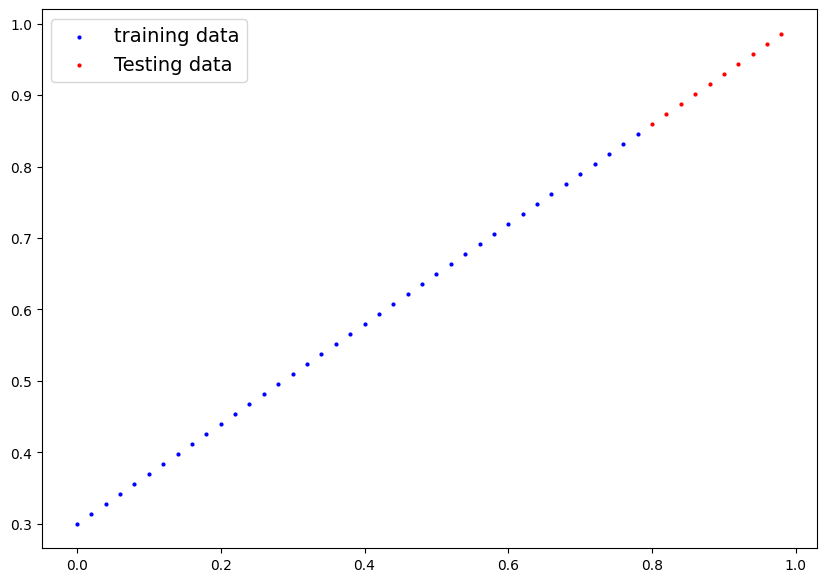

In [8]:
plot_predictions()

## 2. Build model -Linear regression
 `y=mx+c`

weight, bias are parameters here - `nn.parameters`

-  `nn.Parameter`is a special type of tensor that is automatically registered as a parameter of a neural network module  also, it is a learnable parameter of your model that needs to be optimized during the training process.

`-> torch.Tensor`: This is a type hint indicating that the method is expected to return a PyTorch tensor.

`requires_grad=True` : gradient decent algorithm -iteratively calculating the gradient(slope)

In [9]:
class LinearRegressionModel(nn.Module): # Base class for all NN modules
  def __init__(self):
    super().__init__()
    #Initialize Model Parameters
    self.weights= nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float)) #weight
    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True,
                                        dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x +self.bias #linear regression


#### pytorch nn essentials
1. `torch.nn`- contains all building blocks for computational graphs
2. `torch.nn.Parameter`- what parameters are model learns
3. `torch.nn.Module` -The base class for all NN modules, if we subclass it we can overwrite the `forward()` method
4. `torch.optim` - optimizers in pytorch : gradient descent
5. `def forward()` - all nn.Module subclasses are required to override this function

In [10]:
torch.manual_seed(42)
#instance
model_0= LinearRegressionModel()
#see parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [11]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [12]:
#make predictions with model
with torch.inference_mode(): # with - context manager
  y_preds= model_0(X_test)
y_preds
#torch.inference_mode() -> turns off gradient tracking
# also can use torch.no_grad()

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

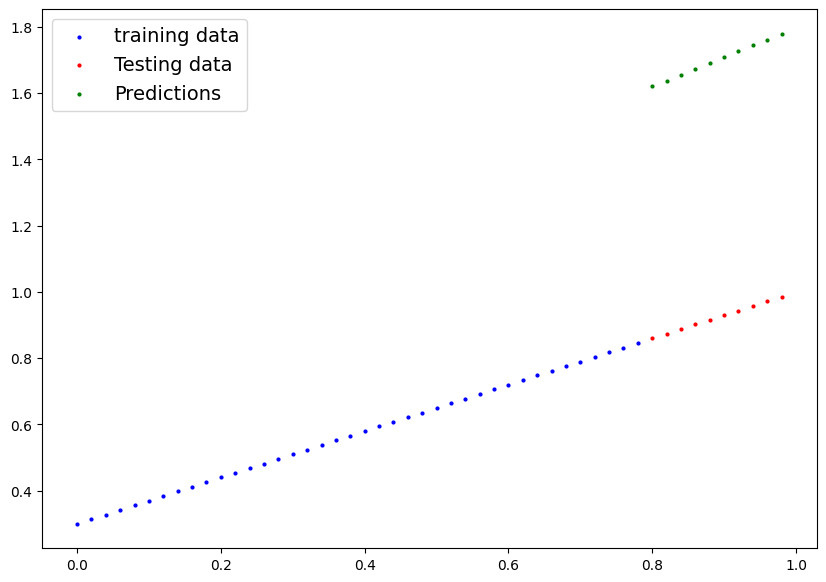

In [14]:
plot_predictions(predictions=y_preds)

## 3. Training Model
move from unknown param -> known parameters

to measure this - we *loss function* / *cost function* / *criterion*

Things we need to train:
 - *Loss fucntion*- A fucntion to measure how wrong the model's performance to the ideal output is - lower the better
 - *optimizer* - Takes into account the loss of a model and adjust the model's parameters to improve the loss function

in pytorch we need:
- A training loop
- A testing loop





In [17]:
#loss fucntion- for this problem nn.L1Loss( mean absolute error (MAE))- just the distance
loss_fn =nn.L1Loss()

#optimizer - torch.optim: optimization algorithms
#SGD -Stochastic (random) gradient descent

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [18]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 101

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 
Epoch: 100 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


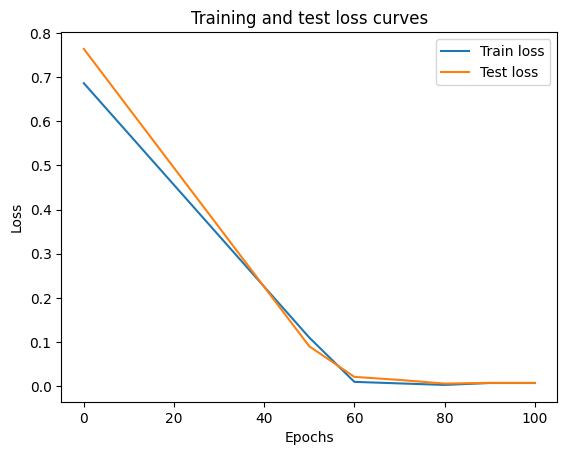

In [19]:

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [20]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6938])), ('bias', tensor([0.2980]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Saving Model - for inference
3 main methods to save and load model:
1. `torch.save()` :allows to save pytorch obj in pickle format
2. `torch.load()` - to load a saved pytorch object
3.`torch.nn.Module.load_state_dict()`-this allows to load a model''s saved state dictionary





```
from pathlib import Path
#1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.MKDIR(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME="01_pytorch_workflow.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH


```





```
#3. Save the mode - state_dict()

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH) #obj- saved obj #f- path obj

```



### Saved in google drive



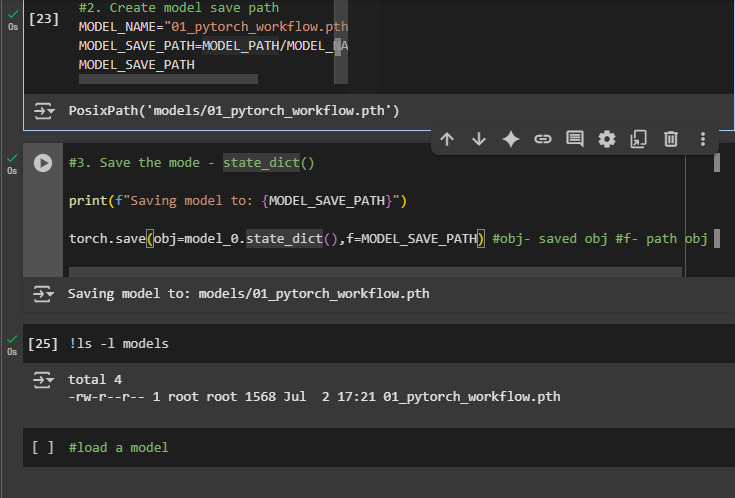


#load a model

```
model_load=torch.load(f=MODEL_SAVE_PATH)
model_load

#make predictions with new loaded model
model_v1.eval()
with torch.inference_mode():
  y_preds_loaded= model_v1(X_test)

y_preds_loaded
```

